# Group - 189 DL Assignment-1 (Q1)
* Abhijith K.S         -  2020fc04193
* Keesari Shravya      -  2020fc04582
* Pranesh V            -  2020fc04961


# Import Libraries/Dataset (0 mark)

1. Import the required libraries and the dataset (use Google Drive if required).
2. Check the GPU available (recommended- use free GPU provided by Google Colab).



In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
from google.colab import data_table
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

GPU is available


## Installing kaggle package to dowload the dataset from Kaggle directly

In [3]:
! pip install -q kaggle

#upload the kaggle.json file for credentials 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aks3743","key":"ff0685a90da06d5745d86da9be9fbc8a"}'}

Creating a directory for kaggle and fetches the "imoore 60k-stack-overflow-questions-with-quality-rate" dataset directly from kaggle

In [4]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# download the dataset
!kaggle datasets download -d imoore/60k-stack-overflow-questions-with-quality-rate

# create a floder "data" in the current directory
! mkdir data

# unzip the dataset into the folder data
! unzip 60k-stack-overflow-questions-with-quality-rate.zip -d data

rm: cannot remove '/root/.kaggle': No such file or directory
 24% 5.00M/21.0M [00:00<00:00, 47.7MB/s]
100% 21.0M/21.0M [00:00<00:00, 129MB/s] 
Archive:  60k-stack-overflow-questions-with-quality-rate.zip
  inflating: data/train.csv          
  inflating: data/valid.csv          


# Data Visualization (0.75 mark)
1. Print at least two records from each class of the dataset, for a sanity check that labels match the text.
2. Plot a bar graph of class distribution in the dataset. Each bar depicts the number of records belonging to a particular class in the dataset. (recommended - matplotlib/seaborn libraries)
3. Any other visualizations that seem appropriate for this problem are encouraged but not necessary, for the points.
4. Print the shapes of train and test data.






In [5]:
# loading the train and validation data into pandas dataframes
train_data=pd.read_csv("./data/train.csv")
val_data=pd.read_csv("./data/valid.csv")

In [6]:
print("Classes in the train dataset : ",train_data.Y.unique())
print("Classes in the valid dataset : ",val_data.Y.unique())

Classes in the train dataset :  ['LQ_CLOSE' 'HQ' 'LQ_EDIT']
Classes in the valid dataset :  ['LQ_EDIT' 'HQ' 'LQ_CLOSE']


In [7]:
train_data.query('Y=="LQ_CLOSE"').sample(2)

,Id,Title,Body,Tags,CreationDate,Y
43879,59289471,How to display programmable exactly what time?...,<p>It is necessary to create an analog clock.H...,<android-studio>,2019-12-11 15:49:21,LQ_CLOSE
39506,55443797,Why do the following comparisons give differen...,<p>I'm trying to compare the following two qua...,<c++><stl>,2019-03-31 17:56:15,LQ_CLOSE


In [8]:
train_data.query('Y=="HQ"').sample(2)

,Id,Title,Body,Tags,CreationDate,Y
6047,37315317,What is the difference between @Inject and @In...,<p>I don't understand When to use @Inject and ...,<dependency-injection><typescript><angular><in...,2016-05-19 06:22:11,HQ
18658,43019832,Auto Versioning in Visual Studio 2017 (.NET Core),<p>I have spent the better part of a few hours...,<c#><visual-studio><.net-core><visual-studio-2...,2017-03-25 17:48:16,HQ


In [9]:
train_data.query('Y=="LQ_EDIT"').sample(2)

,Id,Title,Body,Tags,CreationDate,Y
30913,49713063,Camunda - Configurar Service task como externa...,**Camunda**\r\n\r\nComo configurar uma service...,<bpmn><business-process-management><camunda><c...,2018-04-07 23:44:32,LQ_EDIT
14173,40948425,Cardview - edittext + image + buttons,I have problem with **Cardview**. I want this ...,<android><android-cardview>,2016-12-03 13:42:29,LQ_EDIT


In [10]:
# printing the table using colab.data_tables (intracative)
# data_table.DataTable(train_data, include_index=False, num_rows_per_page=5)

In [11]:
train_data.groupby('Y').count()

,Id,Title,Body,Tags,CreationDate
Y,,,,,
HQ,15000,15000,15000,15000,15000
LQ_CLOSE,15000,15000,15000,15000,15000
LQ_EDIT,15000,15000,15000,15000,15000


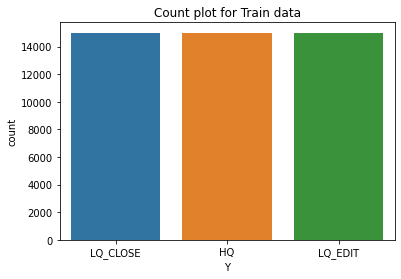

In [12]:
# Bar graph of class distribution in the dataset- train
sns.countplot(x ='Y',  data = train_data)
plt.title("Count plot for Train data")
# Show the plot
plt.show()

In [13]:
val_data.groupby('Y').count()

,Id,Title,Body,Tags,CreationDate
Y,,,,,
HQ,5000,5000,5000,5000,5000
LQ_CLOSE,5000,5000,5000,5000,5000
LQ_EDIT,5000,5000,5000,5000,5000


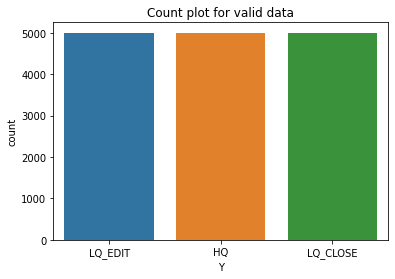

In [14]:
# Bar graph of class distribution in the dataset- valid
sns.countplot(x ='Y',  data = val_data)
plt.title("Count plot for valid data")
# Show the plot
plt.show()

In [15]:
# Print the shapes of train and test data.
print("Shape of train data : ",train_data.shape)
print("Sahpe of valid data : ",val_data.shape)

Shape of train data :  (45000, 6)
Sahpe of valid data :  (15000, 6)


# Data Pre-processing (0.25 mark)
1. Need for this Step- Since the models we use cannot accept string inputs or cannot be of the string format. We have to come up with a way of handling this step. The discussion of different ways of handling this step is out of the scope of this assignment.
2. Please usethis pre-trained embedding layer  (Links to an external site.)from TensorFlow hub for this assignment. This link also has a code snippet on how to convert a sentence to a vector. Refer to that for further clarity on this subject.
3. Bring the train and test data in the required format.

In [16]:
# loading the embeddings mentioned
embedding = "https://tfhub.dev/google/nnlm-en-dim128/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)

# Model Building (0.2*5 = 1 mark)
1. Sequential Model layers- Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.
2. Add L2 regularization to all the layers.
3. Add one layer of dropout at the appropriate position and give reasons.
4. Choose the appropriate activation function for all the layers.
5. Print the model summary.

In [17]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(1024, activation='relu',kernel_regularizer='l2'))
model.add(tf.keras.layers.Dense(256, activation='relu',kernel_regularizer='l2'))
model.add(tf.keras.layers.Dense(128, activation='relu',kernel_regularizer='l2'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(3,activation="softmax",kernel_regularizer='l2'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 128)               124642688 
                                                                 
 dense (Dense)               (None, 1024)              132096    
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 125,070,467
Trainable params: 125,070,467


# Reasons:
1. Used 3 hidden layers along with 1 initial hub layer and a dropout layer. 3 hidden layers with 1024/256/128 hidden units are giving best result. More the number of layer, longer is the time taken to train the model with more chances of overfitting.
2. Tested dropout at first dense layer then second layer then third dense layer. We found that after third layer the model has good performance in accuracy. Hence we positioned the dropout after third layer.

# Model Compilation (0.25 mark)
1. Compile the model with the appropriate loss function.
2. Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.
3. Use accuracy as a metric.

In [18]:
# loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
# optimizer
optimizer = tf.keras.optimizers.Adam(0.00003)
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'],
              
              )

# Reasons:
* If the learning rate is high, then training may not converge or even diverge. Weight changes can be so big that the optimizer overshoots the minimum and makes the loss worse. So we have chosen between 0.001 and 0.01 and compared their accuracy performance. Furthermore very less learning rate takes longer time.

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y_val = encoder.fit_transform(val_data.Y)


In [20]:
train_data['Body']=train_data['Title'] + train_data['Body']
val_data['Body']=val_data['Title'] + val_data['Body']

In [21]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(train_data, test_size=0.5,random_state=123)
Y_train=train.Y
Y_train=encoder.fit_transform(Y_train)
Y_test=test.Y
Y_test=encoder.fit_transform(Y_test)



# Model Training (0.5 + 0.25 = 0.75 mark)
1. Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.
2. Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training.

In [22]:
import time

obj = time.gmtime(0)

history = model.fit(train.Body,Y_train,batch_size=512,
                epochs=25,
                validation_data=(test.Body,Y_test),
                verbose=True)
time_sec = time.time()
print("Time taken for training: ", time_sec, " seconds")

Epoch 1/25
44/44 [==============================] - 10s 142ms/step - loss: 9.0537 - accuracy: 0.3781 - val_loss: 8.8473 - val_accuracy: 0.4146
Epoch 2/25
44/44 [==============================] - 6s 135ms/step - loss: 8.6568 - accuracy: 0.4255 - val_loss: 8.4608 - val_accuracy: 0.4377
Epoch 3/25
44/44 [==============================] - 6s 136ms/step - loss: 8.2783 - accuracy: 0.4505 - val_loss: 8.0917 - val_accuracy: 0.4560
Epoch 4/25
44/44 [==============================] - 6s 135ms/step - loss: 7.9168 - accuracy: 0.4663 - val_loss: 7.7385 - val_accuracy: 0.4772
Epoch 5/25
44/44 [==============================] - 6s 135ms/step - loss: 7.5702 - accuracy: 0.4949 - val_loss: 7.3996 - val_accuracy: 0.5000
Epoch 6/25
44/44 [==============================] - 6s 135ms/step - loss: 7.2369 - accuracy: 0.5159 - val_loss: 7.0733 - val_accuracy: 0.5316
Epoch 7/25
44/44 [==============================] - 6s 148ms/step - loss: 6.9153 - accuracy: 0.5473 - val_loss: 6.7584 - val_accuracy: 0.5495
Epoch

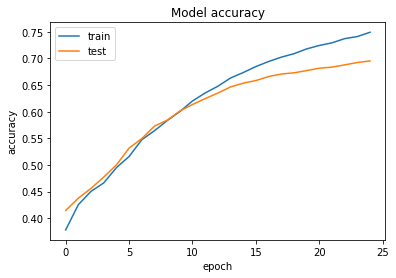

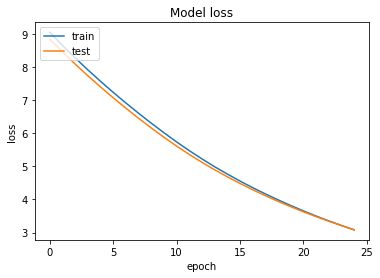

In [23]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
model.optimizer.get_config()

{'amsgrad': False,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'decay': 0.0,
 'epsilon': 1e-07,
 'learning_rate': 3e-05,
 'name': 'Adam'}

# Model Evaluation (0.5 + 0.5 = 1 mark)
1. Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.
2. Print the two most incorrectly classified records for each class in the test dataset.

In [25]:
results = model.evaluate(val_data.Body,Y_val, verbose=1)

for name, value in zip(model.metrics_names, results):
  print("Validation %s: %.3f" % (name, value))

469/469 [==============================] - 5s 12ms/step - loss: 3.0822 - accuracy: 0.7020
Validation loss: 3.082
Validation accuracy: 0.702


In [26]:
from sklearn.metrics import confusion_matrix
import numpy as np


In [27]:
y_pred=model.predict(val_data.Body)

In [28]:
Pred_classes = np.argmax(y_pred, axis = 1)
print(Pred_classes)
print(Y_val)

[2 2 0 ... 2 1 0]
[2 2 0 ... 2 1 1]


In [29]:
encoder.inverse_transform([0, 1, 2])

array(['HQ', 'LQ_CLOSE', 'LQ_EDIT'], dtype=object)

**Classification Report**

In [30]:
print("Detailed classification report:\n")
print(classification_report(Y_val, Pred_classes))

Detailed classification report:

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      5000
           1       0.59      0.60      0.60      5000
           2       0.76      0.70      0.73      5000

    accuracy                           0.70     15000
   macro avg       0.70      0.70      0.70     15000
weighted avg       0.70      0.70      0.70     15000



**Confusion Matrix**

In [31]:
cm=confusion_matrix(Y_val,Pred_classes,labels = [0, 1, 2])
# Creating a dataframe for an array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = encoder.inverse_transform([0, 1, 2]), 
                     columns = encoder.inverse_transform([0, 1, 2]))

In [32]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True class')
  plt.xlabel('Predicted class');
  plt.title("Confusion Matrix")

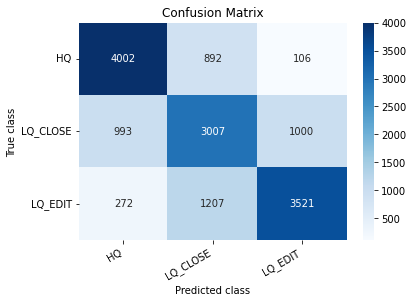

In [33]:
show_confusion_matrix(cm_df)



🙂 *best* performing class is : **HQ** Since it has more number of classifications correctly classified

😞 *worst* performing class is : **LQ_CLOSE** Since it has more number of classifications incorrectly classified 









In [34]:
val_data['Y_val']=Y_val
val_data['Pred_classes']=Pred_classes

In [35]:
def print_incorrect_record(clas):
    global val
    val=val_data[(val_data['Y']==clas) & (val_data['Y_val']!=val_data['Pred_classes'])]

    

In [36]:
clas='HQ'
print('For class {} '.format(clas))
print_incorrect_record(clas)
# data_table.DataTable(val, include_index=False, num_rows_per_page=2)



For class HQ 


In [37]:
clas='LQ_CLOSE'
print('For class {}'.format(clas))
print_incorrect_record(clas)
# data_table.DataTable(val, include_index=False, num_rows_per_page=2)

For class LQ_CLOSE


In [38]:
clas='LQ_EDIT'
print('For class {} '.format(clas))
print_incorrect_record(clas)
# data_table.DataTable(val, include_index=False, num_rows_per_page=2)

For class LQ_EDIT 




# Hyperparameter Tuning 
Build two more models by changing the following hyperparameters one at a time. Write the code for Model Building, Model Compilation, Model Training and Model Evaluation as given in the instructions above for each additional model. (1 + 1 = 2 marks)

1. Regularization: Train a model without regularization
2. Dropout:Change the position and value of dropout layer

Write a comparison between each model and give reasons for the difference in results.

## Regularization: Train a model without regularization

In [39]:
model_1 = tf.keras.Sequential()
model_1.add(hub_layer)
model_1.add(tf.keras.layers.Dense(1024, activation='relu'))
model_1.add(tf.keras.layers.Dense(256, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(tf.keras.layers.Dense(128, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(tf.keras.layers.Dense(3,activation="softmax"))

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 128)               124642688 
                                                                 
 dense_4 (Dense)             (None, 1024)              132096    
                                                                 
 dense_5 (Dense)             (None, 256)               262400    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 3)                

In [40]:
# loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
# optimizer
optimizer = tf.keras.optimizers.Adam(0.00003)
model_1.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'],
              
              )

In [41]:
history_1 = model_1.fit(train.Body,Y_train,batch_size=512,
                epochs=25,
                validation_data=(test.Body,Y_test),
                verbose=True)

Epoch 1/25
44/44 [==============================] - 7s 139ms/step - loss: 1.0653 - accuracy: 0.4717 - val_loss: 1.0237 - val_accuracy: 0.5416
Epoch 2/25
44/44 [==============================] - 6s 134ms/step - loss: 0.9714 - accuracy: 0.6012 - val_loss: 0.9210 - val_accuracy: 0.6310
Epoch 3/25
44/44 [==============================] - 6s 133ms/step - loss: 0.8499 - accuracy: 0.6772 - val_loss: 0.8052 - val_accuracy: 0.6737
Epoch 4/25
44/44 [==============================] - 6s 133ms/step - loss: 0.7346 - accuracy: 0.7135 - val_loss: 0.7206 - val_accuracy: 0.6908
Epoch 5/25
44/44 [==============================] - 6s 134ms/step - loss: 0.6523 - accuracy: 0.7386 - val_loss: 0.6772 - val_accuracy: 0.7027
Epoch 6/25
44/44 [==============================] - 6s 133ms/step - loss: 0.6012 - accuracy: 0.7506 - val_loss: 0.6561 - val_accuracy: 0.7088
Epoch 7/25
44/44 [==============================] - 6s 133ms/step - loss: 0.5693 - accuracy: 0.7640 - val_loss: 0.6446 - val_accuracy: 0.7145
Epoch 

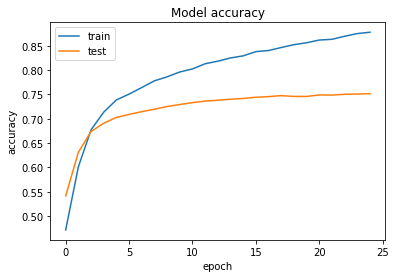

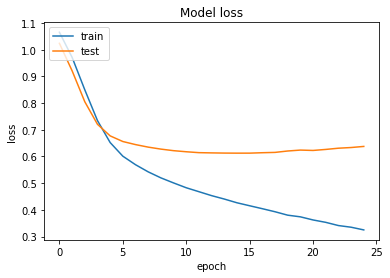

In [42]:
# summarize history for accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
results_1 = model_1.evaluate(val_data.Body,Y_val, verbose=1)

for name, value in zip(model_1.metrics_names, results_1):
  print("%s: %.3f" % (name, value))

469/469 [==============================] - 5s 11ms/step - loss: 0.6381 - accuracy: 0.7529
loss: 0.638
accuracy: 0.753


## Dropout:Change the position and value of dropout layer

In [44]:
model_2= tf.keras.Sequential()
model_2.add(hub_layer)
model_2.add(tf.keras.layers.Dense(1024, activation='relu',kernel_regularizer='l2'))
model_2.add(tf.keras.layers.Dense(256, activation='relu',kernel_regularizer='l2'))
model_2.add(Dropout(0.5))
model_2.add(tf.keras.layers.Dense(128, activation='relu',kernel_regularizer='l2'))
model_2.add(tf.keras.layers.Dense(3,activation="softmax",kernel_regularizer='l2'))

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 128)               124642688 
                                                                 
 dense_8 (Dense)             (None, 1024)              132096    
                                                                 
 dense_9 (Dense)             (None, 256)               262400    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 3)                 387       
                                                                 
Total params: 125,070,467
Trainable params: 125,070,46

In [45]:
# loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
# optimizer
optimizer = tf.keras.optimizers.Adam(0.00003)
model_2.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'],
              
              )

In [46]:
history_2 = model_2.fit(train.Body,Y_train,batch_size=512,
                epochs=25,
                validation_data=(test.Body,Y_test),
                verbose=True)

Epoch 1/25
44/44 [==============================] - 7s 141ms/step - loss: 9.0230 - accuracy: 0.4022 - val_loss: 8.8116 - val_accuracy: 0.5575
Epoch 2/25
44/44 [==============================] - 6s 135ms/step - loss: 8.6192 - accuracy: 0.5444 - val_loss: 8.4151 - val_accuracy: 0.5825
Epoch 3/25
44/44 [==============================] - 6s 134ms/step - loss: 8.2269 - accuracy: 0.6059 - val_loss: 8.0284 - val_accuracy: 0.6192
Epoch 4/25
44/44 [==============================] - 6s 135ms/step - loss: 7.8438 - accuracy: 0.6540 - val_loss: 7.6508 - val_accuracy: 0.6394
Epoch 5/25
44/44 [==============================] - 6s 134ms/step - loss: 7.4685 - accuracy: 0.6858 - val_loss: 7.2866 - val_accuracy: 0.6698
Epoch 6/25
44/44 [==============================] - 6s 134ms/step - loss: 7.1072 - accuracy: 0.7132 - val_loss: 6.9417 - val_accuracy: 0.6887
Epoch 7/25
44/44 [==============================] - 6s 133ms/step - loss: 6.7620 - accuracy: 0.7354 - val_loss: 6.6208 - val_accuracy: 0.6973
Epoch 

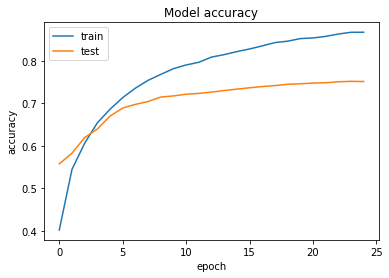

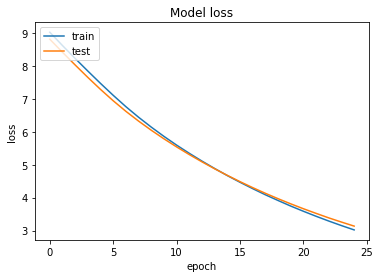

In [47]:
# summarize history for accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
results_2 = model_2.evaluate(val_data.Body,Y_val, verbose=1)

for name, value in zip(model_2.metrics_names, results_1):
  print("%s: %.3f" % (name, value))

469/469 [==============================] - 5s 11ms/step - loss: 3.1369 - accuracy: 0.7549
loss: 0.638
accuracy: 0.753


## Write a comparison between each model and give reasons for the difference in results

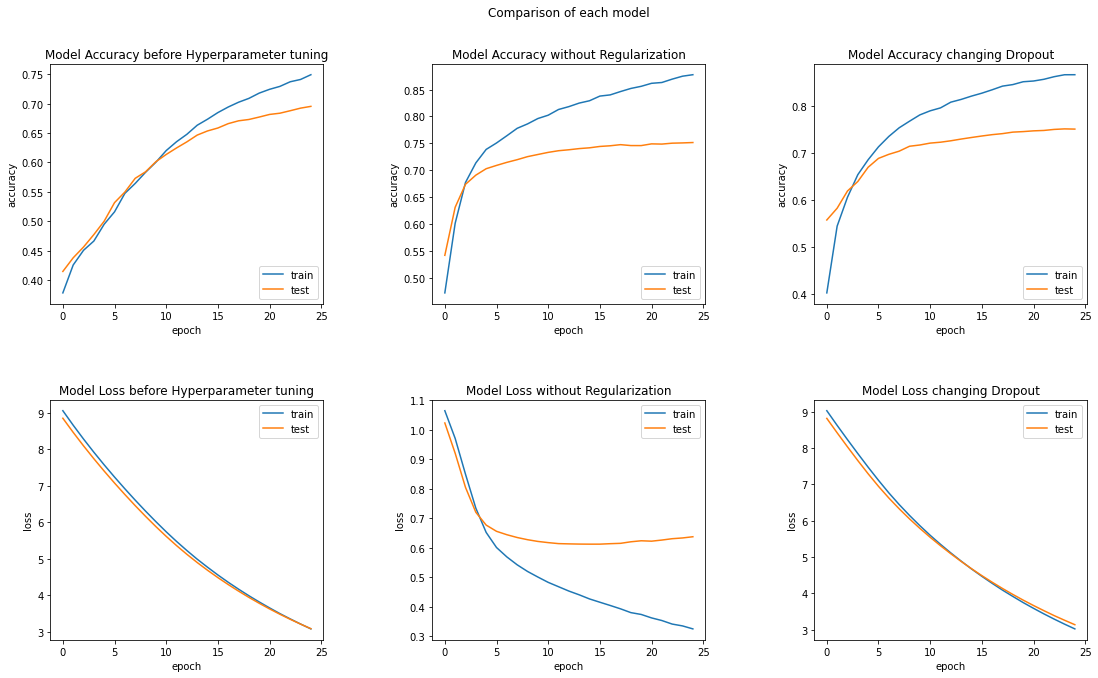

In [49]:
fig, axs = plt.subplots(2, 3, figsize=(18,10))
fig.suptitle('Comparison of each model')

axs[0, 0].set_title('Model Accuracy before Hyperparameter tuning')
axs[0, 0].plot(history.history['accuracy'])
axs[0, 0].plot(history.history['val_accuracy'])
axs[0, 0].legend(['train', 'test'], loc='lower right')
axs[0, 0].set(ylabel='accuracy')
axs[0, 0].set(xlabel='epoch')

axs[0, 1].set_title('Model Accuracy without Regularization')
axs[0, 1].plot(history_1.history['accuracy'])
axs[0, 1].plot(history_1.history['val_accuracy'])
axs[0, 1].legend(['train', 'test'], loc='lower right')
axs[0, 1].set(ylabel='accuracy')
axs[0, 1].set(xlabel='epoch')

axs[0, 2].set_title('Model Accuracy changing Dropout')
axs[0, 2].plot(history_2.history['accuracy'])
axs[0, 2].plot(history_2.history['val_accuracy'])
axs[0, 2].legend(['train', 'test'], loc='lower right')
axs[0, 2].set(ylabel='accuracy')
axs[0, 2].set(xlabel='epoch')


axs[1, 0].set_title('Model Loss before Hyperparameter tuning')
axs[1, 0].plot(history.history['loss'])
axs[1, 0].plot(history.history['val_loss'])
axs[1, 0].legend(['train', 'test'], loc='upper right')
axs[1, 0].set(ylabel='loss')
axs[1, 0].set(xlabel='epoch')

axs[1, 1].set_title('Model Loss without Regularization')
axs[1, 1].plot(history_1.history['loss'])
axs[1, 1].plot(history_1.history['val_loss'])
axs[1, 1].legend(['train', 'test'], loc='upper right')
axs[1, 1].set(ylabel='loss')
axs[1, 1].set(xlabel='epoch')

axs[1, 2].set_title('Model Loss changing Dropout')
axs[1, 2].plot(history_2.history['loss'])
axs[1, 2].plot(history_2.history['val_loss'])
axs[1, 2].legend(['train', 'test'], loc='upper right')
axs[1, 2].set(ylabel='loss')
axs[1, 2].set(xlabel='epoch')


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

# Reasons:


*   As seen in the model before hyperparameter tuning, it is observed that both the train and test accuracy increase exponentially after few epochs and the losses are reducing drastically after few epochs.
*   But whereas in the model without regularization, though the test accuracy is starting at higher point it gets saturated after a few epochs and loss remains considerably high even after multiple epochs.
*   Though after changing the dropout the accuracy remains the losses reduces drastically after few epochs in the third model and with increase in more epochs they may diverge further.

